## **A Mushroom Classification Project**

*Description*

* *Our task resolves around a dataset provided by researchers from the University of California, Irvine.*
* *This dataset encapsulates detailed information on 23 mushrooms species, each belonging to the Agaricus and Lepiota Family Mushrom categories.*
*For each species, the dataset classifies them as either edible or poisonous, or of unkown edibility and not recommended. notably, the latter category has been merged with the poisonous one.*
* *Our objective is to develop a machine learning classification model capable of predicting whether a given mushroom is poisonous or edible based on provided features.*

### **Attribute Information**
**Target Variables**
* **classes : edible = e and poisonous = p**
### **Features**
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s

* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

* **bruises**: bruises=t, no=f

* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

* **gill-attachment**: attached=a, descending=d, free=f, notched=n

* **gill-spacing**: close=c, crowded=w, distant=d

* **gill-size**: broad=b, narrow=n

* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

* **stalk-shape**: enlarging=e, tapering=t

* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s

* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s

* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* **veil-type**: partial=p, universal=u

* **veil-color**: brown=n, orange=o, white=w, yellow=y

* **ring-number**: none=n, one=o, two=t

* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [62]:
# Importing Essential Libraries:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# importing machine learning and stats libraries:
from scipy.stats import boxcox 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics 

import warnings
import time

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')


In [4]:
# Import and load data from a CSV file 

odf = pd.read_csv('C:/Users/user/Desktop/Python/Main_Projects/Classificaton_Mushroom_prj/Mushrooms.csv')

In [5]:
# Creating a copy of the dataset to preserve the original data for reference and analysis 

df = odf.copy()

In [7]:
# Printing the Shape of 'df' DataFrame

df.shape

(8124, 23)

In [10]:
# Retrieve information about the structure and attributes of the 'df' DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
# Display the first 5 rows of the 'df' DataFrame for a quick overview of the data

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [11]:
# Count the number of unique values in each column of the 'df' DataFrame

df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [16]:
# Reorder the columns in the DataFrame by moving the 'class' column to the end.

df = df[[col for col in df.columns if col != 'class'] + ['class']]

df.sample(4)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
5228,x,s,b,t,f,f,c,b,w,t,b,s,s,w,w,p,w,o,p,h,s,u,p
6930,k,y,e,f,y,f,c,n,b,t,?,k,k,w,p,p,w,o,e,w,v,l,p
3025,f,y,e,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,k,v,d,e
100,x,f,n,f,n,f,w,b,p,t,e,f,s,w,w,p,w,o,e,k,s,g,e


In [18]:
# Apply Label encoding to categorical columns in a DataFrame using sklearn's LabelEncoder

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

for col in df.columns :
    df[col] = encode.fit_transform(df[col])

In [20]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1,0


In [30]:
corr_df = df[[col for col in df.columns if col != 'veil-type']]

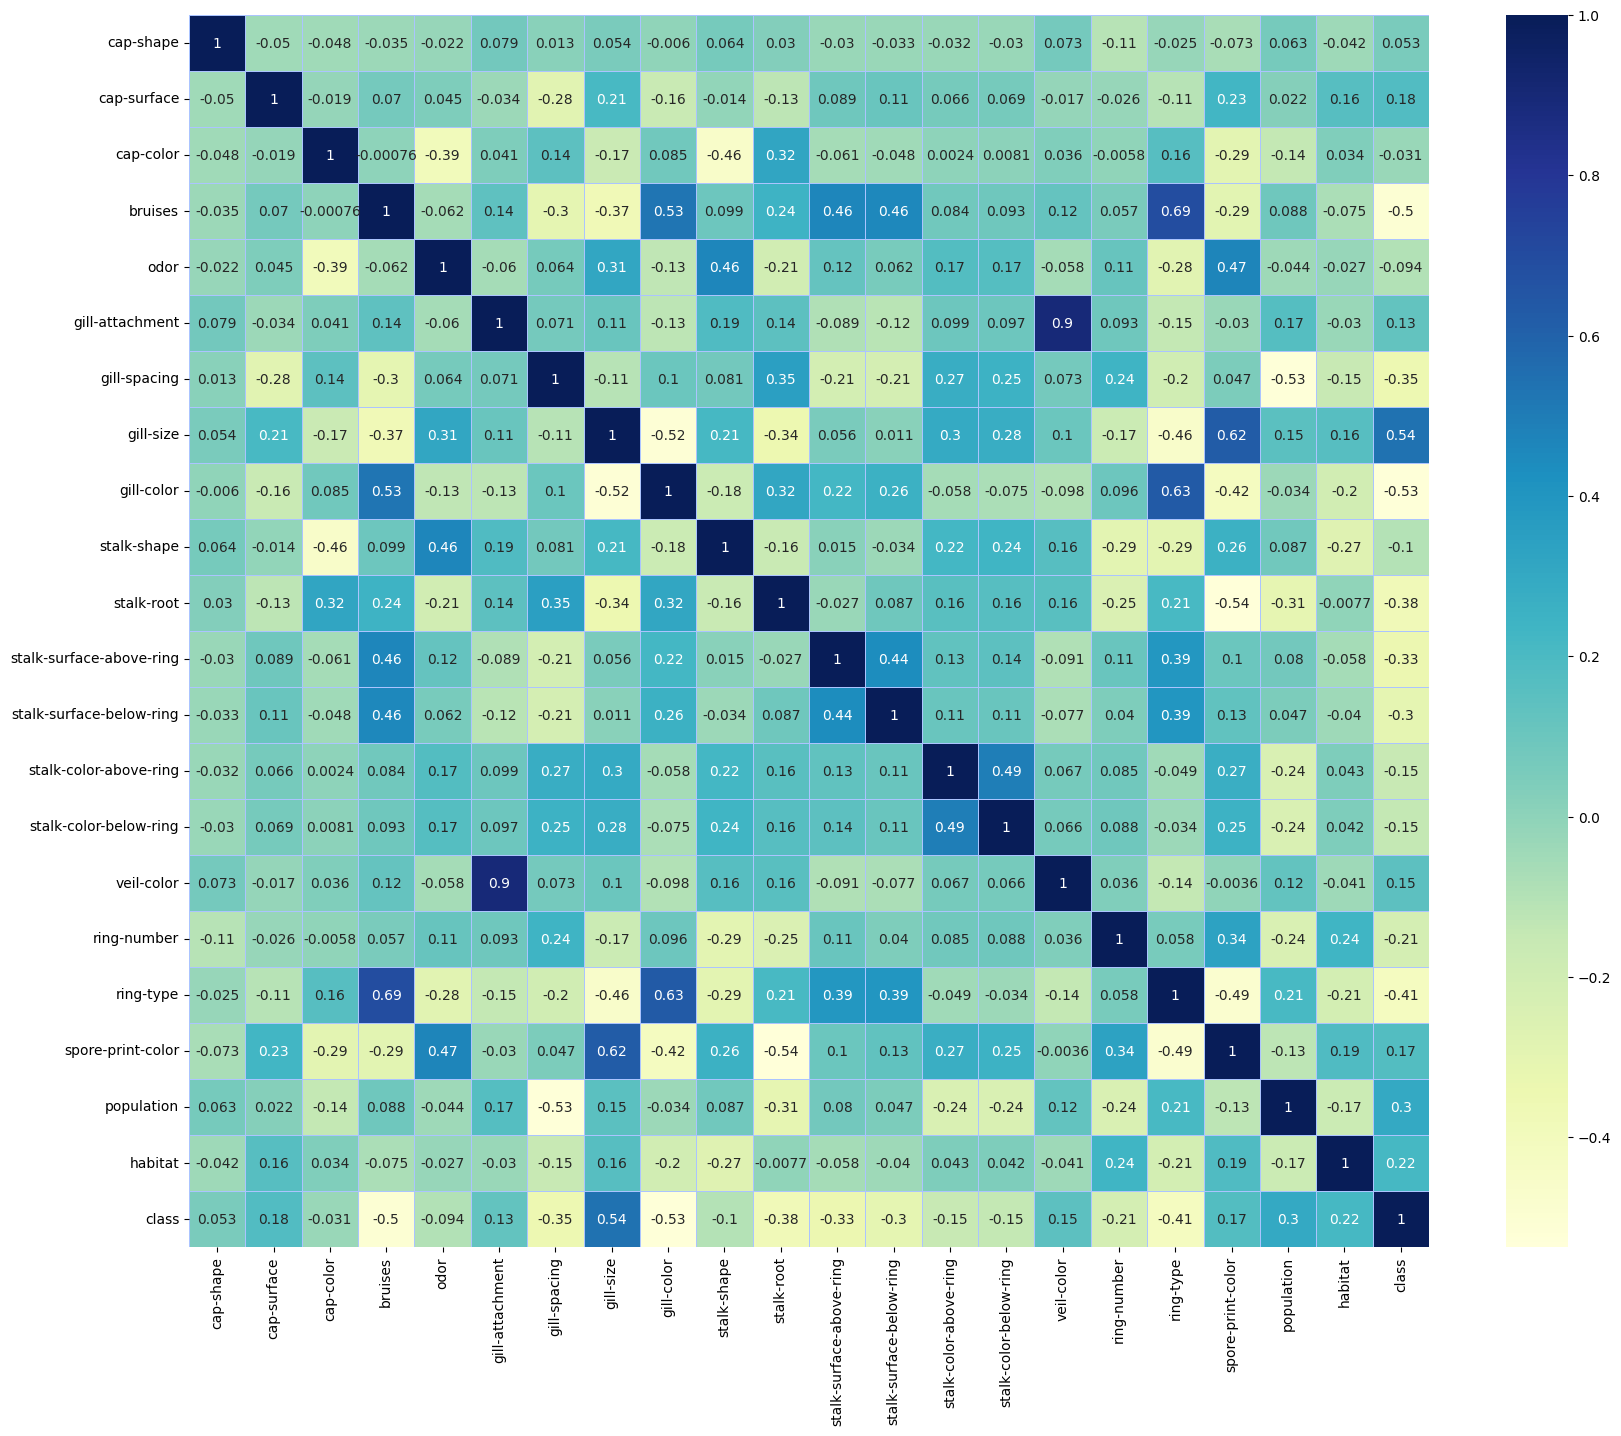

In [34]:
# Visualize the correlation martix usin a heatmap for a clear overview of feature relarionships

plt.figure(figsize=(20,16))
sns.heatmap(corr_df.corr(), annot=True, linecolor='#abc4ff', linewidths=0.5, cmap='YlGnBu')

plt.show()

#### In the above heatmap, we can see that target variable 'Class' is closely correlated with :

* **gill-attachment**
* **cap-surface**
* **gill-size**
* **veil-color**
* **spore-print-color**
* **population**
* **habitat**


In [101]:
# Calculate the proportion of each mushroom type in the 'class' column

Mushroom_type = df['class'].value_counts(normalize=True).reset_index()
Mushroom_type['proportion'] = Mushroom_type['proportion'] * 100
Mushroom_type['proportion'] = Mushroom_type['proportion'].round(2).astype(str) + ' %'

Mushroom_type

,class,proportion
0,0,51.8 %
1,1,48.2 %


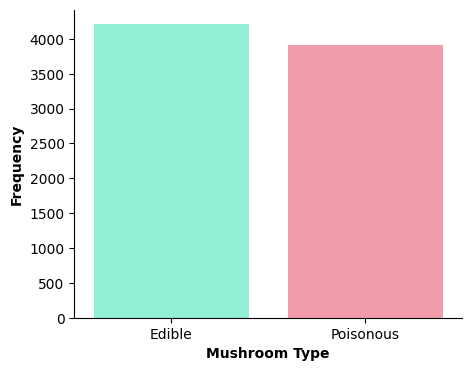

In [45]:
# Create a bar plot to visualize the frequency of each Mushroom Type

plt.figure(figsize=(5,4))

sns.barplot(x=['Edible', 'Poisonous'], y=df['class'].value_counts(), palette={'Edible' : '#80ffdb', 'Poisonous' : '#ff8fa3'})
plt.ylabel('Frequency', fontdict={'weight' : 'bold'})
plt.xlabel('Mushroom Type', fontdict={'weight' : 'bold'})

sns.despine()
plt.show()

In [102]:
# Split the dataset into Training and Testing sets using Sklearn's train_test_split function

from sklearn.model_selection import train_test_split

x = df.drop(columns=['class'])
y = df['class']

xtrain, xtest, ytrain, ytest = train_test_split(x , y, train_size=0.8, random_state=4)

# Display the shapes of the training and testing sets
print(f'Shape of Training Dataset: {xtrain.shape}')
print(f'Shape of Testing Dataset: {xtest.shape}')

Shape of Training Dataset: (6499, 22)
Shape of Testing Dataset: (1625, 22)


In [78]:
# LogisticClassifier

log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)

# Prediction on Training and Testing datasets

train_pred_log = log_model.predict(xtrain)
test_pred_log = log_model.predict(xtest)

# Calculate accuracy scores for the training and testing sets

accuracy_train_log = metrics.accuracy_score(ytrain, train_pred_log)
accuracy_test_log = metrics.accuracy_score(ytest, test_pred_log)

print('Logistic Classifier')
print(f'Accuracy Score for Training : {accuracy_train_log}')
print(f'Accuracy Score for Testing : {accuracy_test_log} \n')

## ---------------------------------------------------------------------

model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain, ytrain)

train_pred_dt = model_dt.predict(xtrain)
test_pred_dt = model_dt.predict(xtest)

accuracy_train_dt = metrics.accuracy_score(ytrain, train_pred_dt)
accuracy_test_dt = metrics.accuracy_score(ytest, test_pred_dt)

print('DecisionTree Classifier')
print(f'Accuracy Score for Training : {accuracy_train_dt}')
print(f'Accuracy Score for Testing : {accuracy_test_dt} \n')

## ---------------------------------------------------------------------

model_rf = RandomForestClassifier()
model_rf.fit(xtrain, ytrain)

train_pred_rf = model_rf.predict(xtrain)
test_pred_rf = model_rf.predict(xtest)

accuracy_train_rf = metrics.accuracy_score(ytrain, train_pred_rf)
accuracy_test_rf = metrics.accuracy_score(ytest, test_pred_rf)

print('RandomForest Classifier')
print(f'Accuracy Score for Training : {accuracy_train_rf}')
print(f'Accuracy Score for Testing : {accuracy_test_rf}')


Logistic Classifier
Accuracy Score for Training : 0.9526080935528543
Accuracy Score for Testing : 0.9544615384615385 

DecisionTree Classifier
Accuracy Score for Training : 1.0
Accuracy Score for Testing : 1.0 

RandomForest Classifier
Accuracy Score for Training : 1.0
Accuracy Score for Testing : 1.0


In [79]:
# Create and train an XGBoost Classifier model, make predictions on both training and testing sets

model_xgb = XGBClassifier()
model_xgb.fit(xtrain, ytrain)

# Predictions on the training set
train_pred_xgb = model_xgb.predict(xtrain)

# Measure the time taken for predictions on the testing set
start_time = time.time()
test_pred_xgb = model_xgb.predict(xtest)
end_time = time.time()

# Calculate accuracy scores for training and testing sets
accuracy_train_xgb = metrics.accuracy_score(ytrain, train_pred_xgb)
accuracy_test_xgb = metrics.accuracy_score(ytest, test_pred_xgb)

# Display XGBClassifier results, accuracy scores, and time taken
print('XGBClassifier')
print(f'Accuracy Score for Training : {accuracy_train_xgb}')
print(f'Accuracy Score for Testing : {accuracy_test_xgb}')
print(f'Time taken by XGB Classifier Algorithm : {round(end_time - start_time, 2)} Seconds.')

XGBClassifier
Accuracy Score for Training : 1.0
Accuracy Score for Testing : 1.0
Time taken by XGB Classifier Algorithm : 0.02 Seconds.


Classification Report For Training : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3363
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499
 

Confusion Matrix For Training


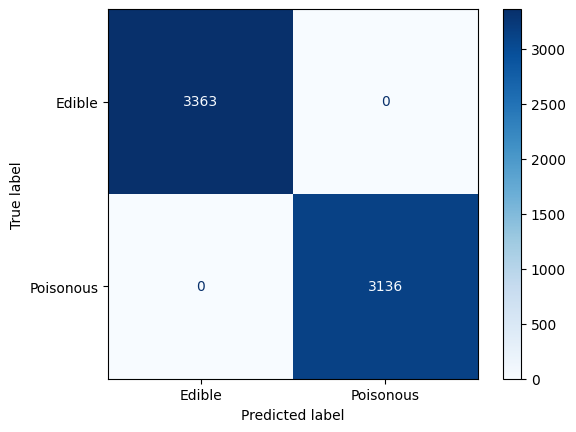

In [96]:
# Display the classification report and confusion matrix for training set predictions using XGBoost Classifier

print('Classification Report For Training : \n')
print(f'{metrics.classification_report(ytrain, train_pred_xgb)} \n')
print('Confusion Matrix For Training')

# Display the confusion matrix for training set predictions

cm = metrics.confusion_matrix(ytrain, train_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Edible', 'Poisonous'])

cm_display.plot(cmap='Blues')
plt.show()

Classification Report For Testing : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

Confusion Matrix For Testing


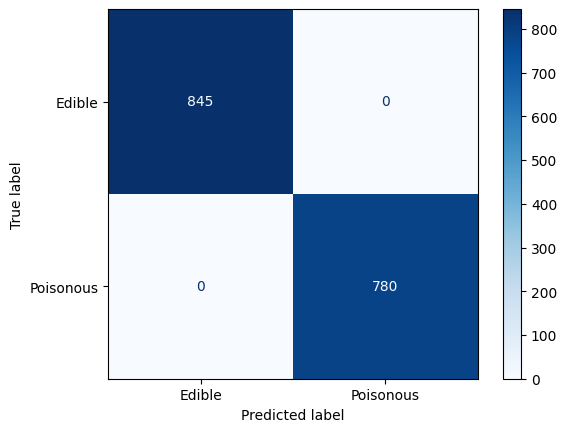

In [93]:
# Display the classification report and confusion matrix for testing set predictions using XGBoost Classifier

print('Classification Report For Testing : \n')
print(f'{metrics.classification_report(ytest, test_pred_xgb)} \n')
print('Confusion Matrix For Testing')

# Display the confusion matrix for tesing set predictions

cm = metrics.confusion_matrix(ytest, test_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Edible', 'Poisonous'])

cm_display.plot(cmap='Blues')
plt.show()

**Conclusion:**

* *The machine learning models assessed on this dataset demonstrated exceptional performance with nearly 100% accuracy, precision, and recall scores.*
* *To determine the most efficient model amonth them, we leveraged the 'time' package and employed the 'time()' function to measure the total time consumed by each algorithm in predicting both training and testing datasets.*
* *Among the various models assessed, the **XGBClassifier** stood out as the most efficient, requering the least amount of time for prediction.*

**Interpretation:**

* *The precision, recall, and F1-score for both classes (0 and 1) are 100%, which indicates perfect performance on both classes.*
* *The accuracy Score is 100%, meaning that the model correctly classified all the instances in the dataset.*

**Confusion Matrix:**

* *The Confusion matrix shows the number of True positive (TP), True negative (TN), False positive (FP), and False negative (FN) Predictions.*
* *For Testing dataset, Confusion matrix showed that there were 845 true positives (Correctly predicted Edible Mushrooms) and 780 True negatives (correctly predicted Poisonous Mushrooms).*

